In [ ]:
#pytoch computer vision write up
# 'torch vision' - base domain library for pytorch computer vision
# torch vision data set using get data sets and data loading fucntions for
# computer vision
#torch.vision models
#torch.transformers - fucntion for manupulating the  vision data (images) t
# be suitable for use with an ML model
#torch.utils.data.Dataset - bse dataset class for pytorch
#torch.utils.DataLoader - create a python iterable over a data set

In [ ]:
#Import torch
import torch
from torch import nn

# Import torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplot lib for visual
import matplotlib.pyplot as plt

In [ ]:
#check version
print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [ ]:
#to get dataset- from MNIST data set nubers in diferrent imgaes for toyset
# fashion MNIST from torch.vision
# Setup training data

In [ ]:
#etup train data
train_data = datasets.FashionMNIST(
    root="data",# where to download the data to ?
    train=True,# Do we want the training datasets?
    download= True,#Do we wan to download
    transform= torchvision.transforms.ToTensor(), #How we want to transform
    target_transform= None # how we want to tranform the lables
)
test_data = datasets.FashionMNIST(
    root="data",
    train= False,
    download= True,
    transform = ToTensor()
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.15MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 140kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.59MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.78MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first traning the sample
image, label =train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [99]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# check the shape of image
print(f"Image shape:{image.shape} ")
print(f"Image lable: {class_names[label]}")

Image shape:torch.Size([1, 28, 28]) 
Image lable: Ankle boot


Image shape :torch.Size([1, 28, 28])


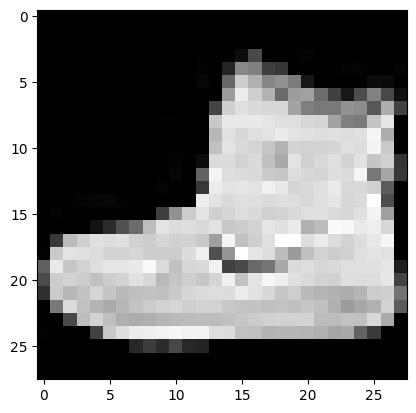

In [ ]:
#Visualize the datat
image, label =train_data[0]
print(f"Image shape :{image.shape}")
plt.imshow(image.squeeze(),cmap="gray")

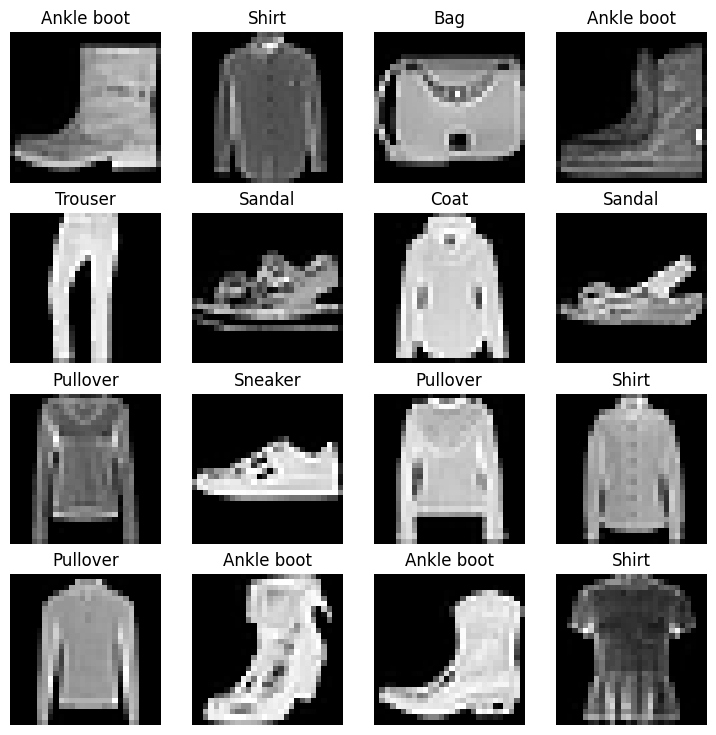

In [ ]:
#Plot more images
torch.manual_seed(42)
fig =plt.figure(figsize=(9,9))
rows,cols =4,4
for i in range (1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label =train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [ ]:
# Is the data needs a linear line or non linearity ? Will findout
# right know the data in pytorch datasets
# Datloader turns into a python iterable
#turn tha data into bacthes (or mini batches)
# Why need batches

1. Batch is  need to split the data for smaller inroder to make the computation takes less space in the storage device.
2. It gives our neural network more chances to update its gradient per Epoch
3.data utils docuemtn read ##

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
    batch_size=32,
    shuffle=True)
test_dataloader= DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False
)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f6c9cfd4210>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6c9cdb4b50>)

In [ ]:
# lets check what created
print(f"Dataloader:{train_dataloader}\n")
print(f"Length of train dataloader:{len(train_dataloader)}\n")
print(f"Type of train dataloader:{type(train_dataloader)}\n")
print(f"Dataloader:{test_dataloader}\n")
print(f"Length of test dataloader:{len(test_dataloader)}\n")
print(f"Type of test dataloader:{type(test_dataloader)}\n")

Dataloader:<torch.utils.data.dataloader.DataLoader object at 0x7f6c9cfd4210>

Length of train dataloader:1875

Type of train dataloader:<class 'torch.utils.data.dataloader.DataLoader'>

Dataloader:<torch.utils.data.dataloader.DataLoader object at 0x7f6c9cdb4b50>

Length of test dataloader:313

Type of test dataloader:<class 'torch.utils.data.dataloader.DataLoader'>



In [ ]:
# Viusalize the data
train_features_batch,train_label_batch = next(iter(train_dataloader))
print(f"Image batch shape:{train_features_batch.shape}")
print(f"Label batch shape:{train_label_batch.shape}")

Image batch shape:torch.Size([32, 1, 28, 28])
Label batch shape:torch.Size([32])


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

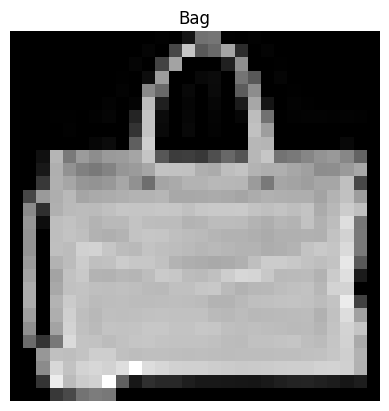

In [ ]:
#Visualize the data
#torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img, label=train_features_batch[random_idx],train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)

# Necessary for Base model
When starting building eperments its better to satrt with abse line model.
A base line model is asimple model will try and imporve upon the subsequent model with Experimneting each mode and add complexity when necessary .

In [ ]:
#creating a flatten layer
flatten_model= nn.Flatten()

#get a single sample
x=train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [ ]:
#lte see what happen after passing it to flatten
# Flatten decerase the dimension from actual dim
output=flatten_model(x)
print(f"Shpae beofre flatten:{x.shape}")
print(f"Shpae after flatten:{output.shape}")

Shpae beofre flatten:torch.Size([1, 28, 28])
Shpae after flatten:torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTMOdelV0(nn.Module):
  def __init__(self,
               input_shape=int,
               hidden_units= int,
               output_shape=int):

    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

#Setup model with params
model_1=FashionMNISTMOdelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model_1

FashionMNISTMOdelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
#For dummy inout data lets have raw outputs i.e, logits
dummy_x=torch.rand([1,1,28,28])
model_1(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

Setup loss
Since we are working with Multiclass data need to use **Loss Function** 'nn.**CrossEntorpyLoss()**'
for **Optimizer** use **stochastic gradienet descent  (SGD)**
for evalutation use **accuracy**



In [ ]:
import requests
from pathlib import Path

#Download helper function from learnpytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


In [ ]:
# Import accuracy matrics from helper function
from helper_functions import accuracy_fn
# setup loss and optimizer
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params =model_1.parameters(),
                           lr=0.1)

#Creating batches
1.Loop through Epochs
2.Loop throguh training batches, peform training set_default_dtypecalculate the train loss on
per bacth.
3.Loop thirugh testing batches , perform testing stepes, calculate the test loss
per batch.
4. print whats happening

In [ ]:
#Import tqdm for progress bar
from tqdm.auto import tqdm

#Set the seed
torch.manual_seed(42)
#Set the number of epochs
epochs = 3

# Create the training loop and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------")
  train_loss=0
  #Add a loop to loop throguh training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_1.train()
    #forward pass
    y_pred=model_1(X)
    #calculate the loss(per batch)
    loss =loss_fn(y_pred,y)
    train_loss+= loss #Cumulate th train loss for each batch
    #optimizer zero grad
    optimizer.zero_grad()
    #backward propagation
    loss.backward()
    #Optimizer step
    optimizer.step()

    #print whats happening
    if batch % 400 ==0:
      print(f"Looked at{batch*len(X)}/{len(train_dataloader.dataset)} samples.")
  #Divide the total train loss by lengh of train data loader
  train_loss/=len(train_dataloader)
  #testing loop
  test_loss,test_acc=0,0
  model_1.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      #Forward pass
      test_pred=model_1(X_test)

      #cal loss
      loss=loss_fn(test_pred,y_test)

     #Acc
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))


    #Calculate the test loss
    test_loss/=len(test_dataloader)

    #calcuate the acc
    test_acc/=len(test_dataloader)

 #whats happening
  print(f"\n Train Loss:{train_loss:.4f} | Test_loss{test_acc:.4f} | Test_acc:{test_acc:.4f}")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
------
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

 Train Loss:0.5904 | Test_loss82.0387 | Test_acc:82.0387
Epoch:1
------
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

 Train Loss:0.4763 | Test_loss83.1969 | Test_acc:83.1969
Epoch:2
------
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

 Train Loss:0.4550 | Test_loss83.4265 | Test_acc:83.4265


In [ ]:
# make prediction and get model1 results
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """return a dicionary containg model predicting the data loader"""

  loss,acc= 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      #make prediction
      y_pred=model(X)

      ##Accumulate the loss and acc values per per batch
      loss +=loss_fn(y_pred,y)
      acc+= accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    #Scale the loss and acc to find the average loss/acc per batch
    loss/=len(data_loader)
    acc/=len(data_loader)
    return {"model_name":model.__class__.__name__,#Model should create with calss only we can call model name
            "model_loss":loss.item(),
            "model_acc":acc}

#Calculate model 1 results on test dataset
model_1_results=eval_model(model=model_1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTMOdelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
#Buliding a better model with non-lineraity
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=input_shape,
            out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(
            in_features=hidden_units,out_features=output_shape
        ),
        nn.ReLU())
  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
#Create a instance of model
torch.manual_seed(42)
model_2 =FashionMNISTModelV1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
)
model_2

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
#Setting Loss fn and Optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_2.parameters(),
                           lr=0.1)

In [ ]:
# Training and evaluation groups as Fucntioning the code for Model training
#1.create funtion for training loop -train step()
#2.Create funciton for test loop-  test step ()

In [ ]:
#Function for train step()
#1.Need model, forwad pass loss , acc , backwrd, optimizer step
def train_step(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
  train_loss,train_acc=0,0
  for batch,(X,y) in enumerate(data_loader):
    model.train()
    #Forward pass
    y_pred=model(X)

    #Calcualte the loss and acc for training
    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    #optimizer zero grad
    optimizer.zero_grad()

    #Loss backward
    loss.backward()

    #optimizer step
    optimizer.step()


  #Divide the total train loss and acc by len of train dataloader
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train loss:{train_loss:.4f}| Train acc:{train_acc:.4f}%")

In [ ]:
# Creating function for test step
#1. Model eval,test_pred,loss, acc
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  test_loss,test_acc=0,0
  model.eval()
  #turn on inference mode
  with torch.inference_mode():
    #Forward pass
    for X,y in data_loader:
      test_pred=model(X)
      #loss
      test_loss=loss_fn(test_pred,y)
      test_loss+=test_loss.item()
      #Accuracy
      test_acc +=accuracy_fn(y_true=y,
                           y_pred=test_pred.argmax(dim=1))

    #adjust the metrics and print out
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test loss:{test_loss:.2f}| Test acc:{test_acc:.2f}%")

In [ ]:
# trainig loop and etsting loop with functions for epochs
torch.manual_seed(42)
#set epochs
epochs=3

#Create a optimization and evaluation with test and train func
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}")
  train_step(
      model=model_2,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn
  )
  test_step(
      model=model_2,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn
  )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
Train loss:1.0920| Train acc:61.3433%
Test loss:0.00| Test acc:65.00%
Epoch:1
Train loss:0.7810| Train acc:71.9283%
Test loss:0.00| Test acc:73.91%
Epoch:2
Train loss:0.6703| Train acc:75.9367%
Test loss:0.00| Test acc:75.02%


In [ ]:
#get model 2 results with eval mod fucntion
model2_results= eval_model(
    model=model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn
)
model2_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
#Model3 :Buliding our CNN(Convulition neural netwrok to find pattern in visual data)
class FashionMNISTModelV3(nn.Module):
  def __init__(self, input_shape:int,
               hidden_units :int,
               output_shape:int):
    super().__init__()
    self.conv_block_1= nn.Sequential(
        nn.Conv2d(in_channels=input_shape,# Use for 2s is s dim data we have
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values we can set in our neural networks they are CNN params
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    #Calssifier layer
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=hidden_units*7*7,#theres trcik for assign the values
            out_features=output_shape
        )
    )
  def forward(self,x:torch.Tensor):
    x=self.conv_block_1(x)
    #print(x.shape)
    x=self.conv_block_2(x)
    #print(x.shape)
    x=self.classifier(x)
    return x

In [ ]:
#Intantiate the CNN model
torch.manual_seed(42)
model_3=FashionMNISTModelV3(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
)

In [ ]:
# Stepping through nn Conv2d
# for Dummy data passing through the layers
torch.manual_seed(42)
images=torch.randn(size=(32,3,64,64))
test_image=images[0]
print(f"Image batch shape:{images.shape}")
print(f"test image:\n{test_image.shape}")
print(f"test image:\n{test_image}")

Image batch shape:torch.Size([32, 3, 64, 64])
test image:
torch.Size([3, 64, 64])
test image:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.

In [ ]:
#Create a single conv2d layer
torch.manual_seed(42)
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=0)

#Pass the data to convoultional layer
conv_output=conv_layer(test_image.unsqueeze(dim=0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [ ]:
# try with test image
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
#print out the original image shape without unsqueezed dimension
print(f"Original image shape:{test_image.shape}")
print(f"Original image unsqueezed shape:{test_image.unsqueeze(dim=0).shape}")

#create a smaple nn.Maxpool2d
max_pool_layer=nn.MaxPool2d(kernel_size=2)

#pas the data throgh conv layer
test_image_through_conv =conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going thrgh conv_layer:{test_image_through_conv.shape}")

#pass the data thrugh the max pool layer
test_image_through_pool=max_pool_layer(test_image_through_conv)
print(f"Shape after going through max pool layer:{test_image_through_pool.shape}")

Original image shape:torch.Size([3, 64, 64])
Original image unsqueezed shape:torch.Size([1, 3, 64, 64])
Shape after going thrgh conv_layer:torch.Size([1, 10, 62, 62])
Shape after going through max pool layer:torch.Size([1, 10, 31, 31])


In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_3(image.unsqueeze(0)).argmax().item()

2

In [ ]:
#Setting Loss fn and Optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_3.parameters(),
                           lr=0.1)

In [ ]:
# trainig loop and etsting loop with functions for epochs
torch.manual_seed(42)
#set epochs
epochs=3

#Create a optimization and evaluation with test and train func
for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}")
  train_step(
      model=model_3,
      data_loader=train_dataloader,
      loss_fn=loss_fn,
      optimizer=optimizer,
      accuracy_fn=accuracy_fn
  )
  test_step(
      model=model_3,
      data_loader=test_dataloader,
      loss_fn=loss_fn,
      accuracy_fn=accuracy_fn
  )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
Train loss:0.5952| Train acc:78.3750%
Test loss:0.00| Test acc:85.99%
Epoch:1
Train loss:0.3654| Train acc:86.9017%
Test loss:0.00| Test acc:86.91%
Epoch:2
Train loss:0.3259| Train acc:88.1283%
Test loss:0.00| Test acc:88.07%


In [ ]:
#get model 3 results with eval mod fucntion
model3_results= eval_model(
    model=model_3,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn
)
model3_results

{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
#Compare the results with dataframe
import pandas as pd
compare_units =pd.DataFrame([model_1_results,
                            model2_results,
                            model3_results]
                            )
compare_units

,model_name,model_loss,model_acc
0,FashionMNISTMOdelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV3,0.327190,88.069089


Text(0, 0.5, 'model')

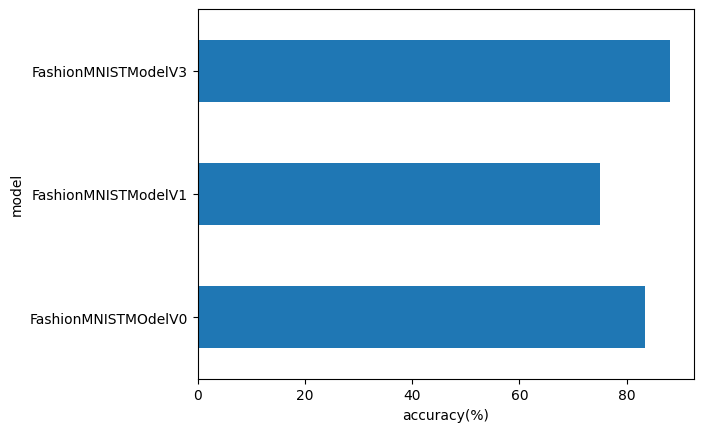

In [ ]:
#Viusalize the model results
compare_units.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

In [ ]:
# make and evaluate the prediction with best model
def make_predictions(model:torch.nn.Module,
                     data:list,
                     ):
  pred_probs=[]
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #unsqueeze the given sample
      sample= torch.unsqueeze(sample,dim=0)
      #getting the raw out put with model
      pred_logit=model(sample)
      #making the  raw logits into predictions
      pred_prob = torch.softmax(pred_logit.squeeze(),dim=0)
      #making the pred probs to lables
      pred_probs.append(pred_prob)
  return torch.stack(pred_probs)

In [ ]:
#Creating random samples out of test data
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)


print(f"Test sample image shape: {test_samples[7].shape}\nTest sample label: {test_labels[7]} ({class_names[test_labels[7]]})")


Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 7 (Sneaker)


In [59]:
#Make predictions
pred_prob=make_predictions(model=model_3,
                            data=test_samples)
#View the 2 predictions probabailities
pred_prob[:2]

tensor([[1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04],
        [1.0080e-01, 5.6287e-01, 7.4506e-04, 1.1212e-01, 6.3881e-02, 3.0674e-04,
         1.5560e-01, 1.6463e-03, 1.0169e-03, 1.0133e-03]])

In [60]:
#Convert prd prob to lables
pred_classes=pred_prob.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

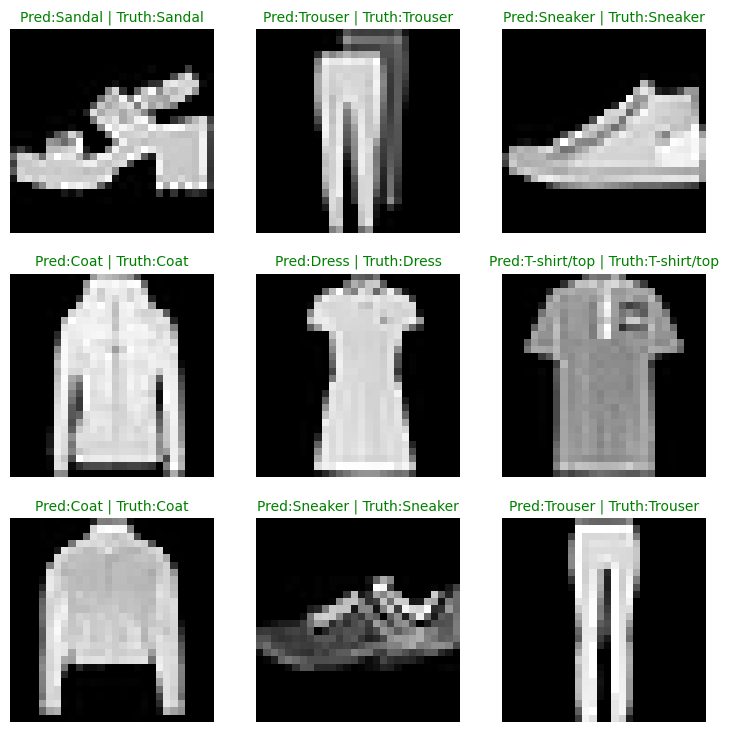

In [63]:
#plot predicitons
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  #Create subplot
  plt.subplot(nrows,ncols,i+1)

  #plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  #find the pred in text
  pred_label=class_names[pred_classes[i]]

  #get the truth lable in test
  truth_label=class_names[test_labels[i]]

  #Create title for plot
  title_text=f"Pred:{pred_label} | Truth:{truth_label}"

  #check the equality bet pred and truth and change of colur of title text
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10,c="g")
  else:
    plt.title(title_text,fontsize=10,c="r")
  plt.axis(False)

In [64]:
#making confusion matrix for prediction evalutation for calssification model
#Make prediction with trained model
#Make confusion matrich with torchmetrics.Confusionmatrix
#Plot confusion matrix using mlxtend.plotting.plot_confusion_matrix

In [77]:
#import tqqdm.auto
from tqdm.auto import tqdm

#make prediciton with trained model
y_preds=[]
model_3.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc="Making prediciton..."):
    #Predict the raw outputs
    y_logits=model_3(X)
    #turn raw outputs to pred
    y_pred=torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
    #append the pred on preds
    y_preds.append(y_pred)
#print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor

Making prediciton...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [78]:
len(y_pred_tensor)

10000

In [84]:
!pip install mlxtend

In [85]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 923.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [86]:
import mlxtend
print(mlxtend.__version__)

0.23.4


In [87]:
import torchmetrics
print(torchmetrics.__version__)

1.7.1


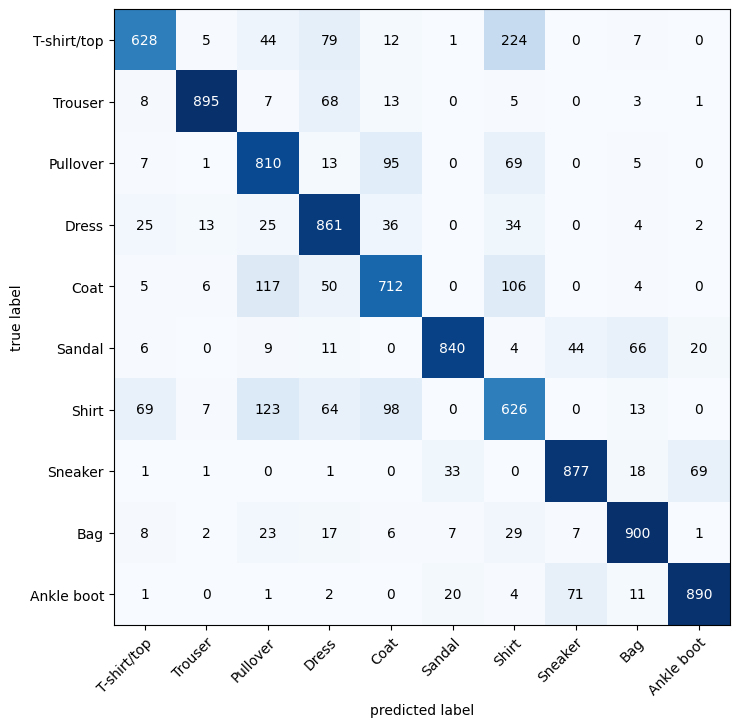

In [100]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#Setup confusion instance and compare prediction to targets
confmat=ConfusionMatrix(task='multiclass',num_classes=len(class_names))
confmat_tensor=confmat(preds=y_pred_tensor,target=test_data.targets)
#Plot confusion matrix
fig,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                             class_names=class_names,
                             figsize=(8,8) )

In [104]:
#Save and load the performing model
from pathlib import Path

#Create model directory path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

#Creae model save
MODEL_NAME="03_Pytorch_computer_vision_model_3.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME


#sva eht model state dict
print(f"Saving model to:{MODEL_SAVE_PATH}")
torch.save(obj=model_3.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to:models/03_Pytorch_computer_vision_model_3.pth


In [107]:
#lets have image_hape
image_shape =[1,28,28]

torch.Size([3, 64, 64])

In [112]:
#Create a new instance
torch.manual_seed(42)

loaded_model_3= FashionMNISTModelV3(input_shape=1,
                                    hidden_units=10,
                                    output_shape=len(class_names))

#Load in save state dict
loaded_model_3.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [113]:
model3_results

{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [114]:
#Evaluate the model
torch.manual_seed(42)

loaded_model_3_results= eval_model(
    model=loaded_model_3,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_3_results

{'model_name': 'FashionMNISTModelV3',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}